In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
w = pd.read_csv(r'D:\Int Project\BASIC\Weather basic\basic\weather.csv', encoding= 'unicode_escape')


# EDA

In [4]:
w.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Date
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,21-12-2023
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,24-05-2023
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,08-07-2023
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,30-06-2023
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,30-09-2023


In [6]:
w.shape


(366, 23)

In [5]:
w.describe

<bound method NDFrame.describe of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure9am  \
0             30.0         SW         NW         

Data Visualisation

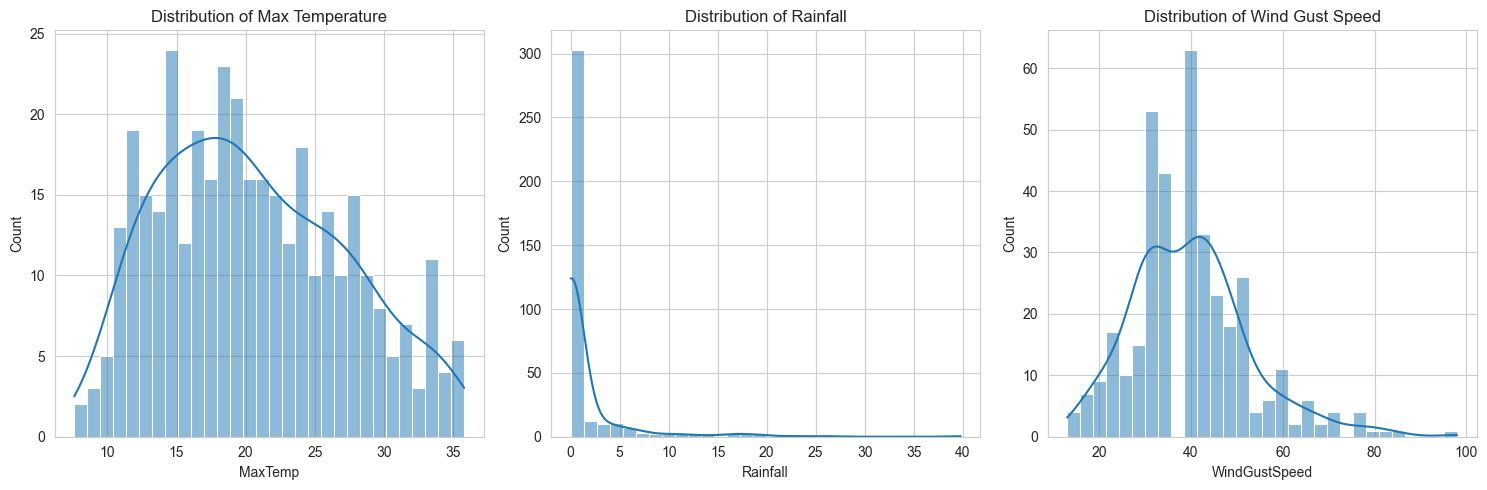

In [7]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Plotting distributions of a few numerical columns
plt.figure(figsize=(15, 5))

# Distribution of Max Temperature
plt.subplot(1, 3, 1)
sns.histplot(w['MaxTemp'], bins=30, kde=True)
plt.title('Distribution of Max Temperature')

# Distribution of Rainfall
plt.subplot(1, 3, 2)
sns.histplot(w['Rainfall'], bins=30, kde=True)
plt.title('Distribution of Rainfall')

# Distribution of Wind Gust Speed
plt.subplot(1, 3, 3)
sns.histplot(w['WindGustSpeed'], bins=30, kde=True)
plt.title('Distribution of Wind Gust Speed')

plt.tight_layout()
plt.show()

In [8]:
w.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
Date              0
dtype: int64

Feature Engineering



In [9]:

# impute missing values
columns_to_impute = ['Sunshine',  'WindSpeed9am']
 

# Replace NaN values with the mean of the specified columns
w[columns_to_impute] = w[columns_to_impute].fillna(w[columns_to_impute].mean())

In [10]:

categorical_columns_to_impute = ['WindGustSpeed', 'WindGustDir', 'WindDir9am','WindDir3pm']


# Replace NaN values with the mode of the specified categorical columns
w[categorical_columns_to_impute] = w[categorical_columns_to_impute].apply(lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else None))


# Alternatively, you can use the fillna method directly
# df[categorical_columns_to_impute] = df[categorical_columns_to_impute].fillna(df[categorical_columns_to_impute].mode().iloc[0])

In [11]:
w.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.846995,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.467180,13.024259,7.875308,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,6.000000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


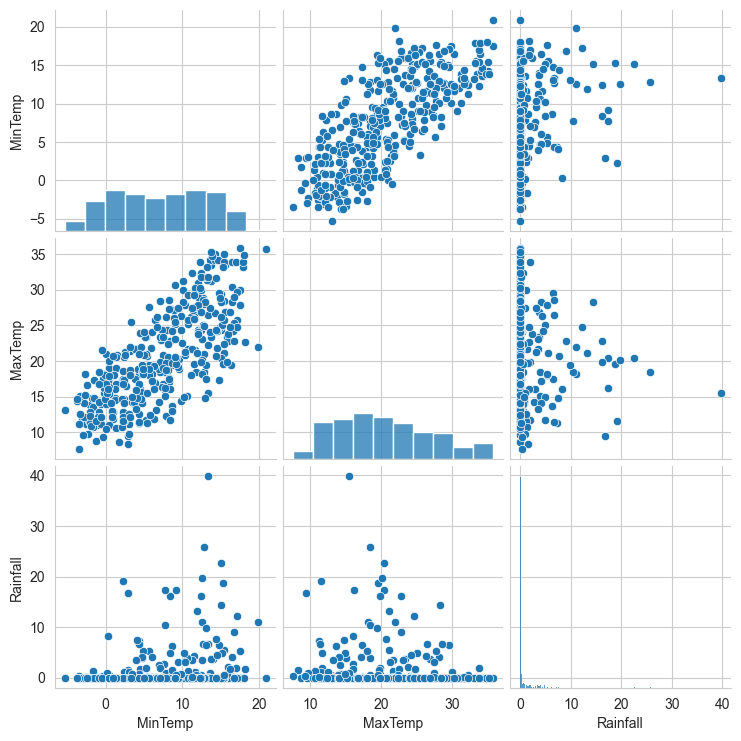

In [12]:
sns.pairplot(w[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [6]:
w.dropna

<bound method DataFrame.dropna of      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Pressure9am  \
0             30.0         SW         NW         

In [14]:
categorical_columns = w.select_dtypes(include=['object']).columns


# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    w[col] = label_encoder.fit_transform(w[col])

Correlation

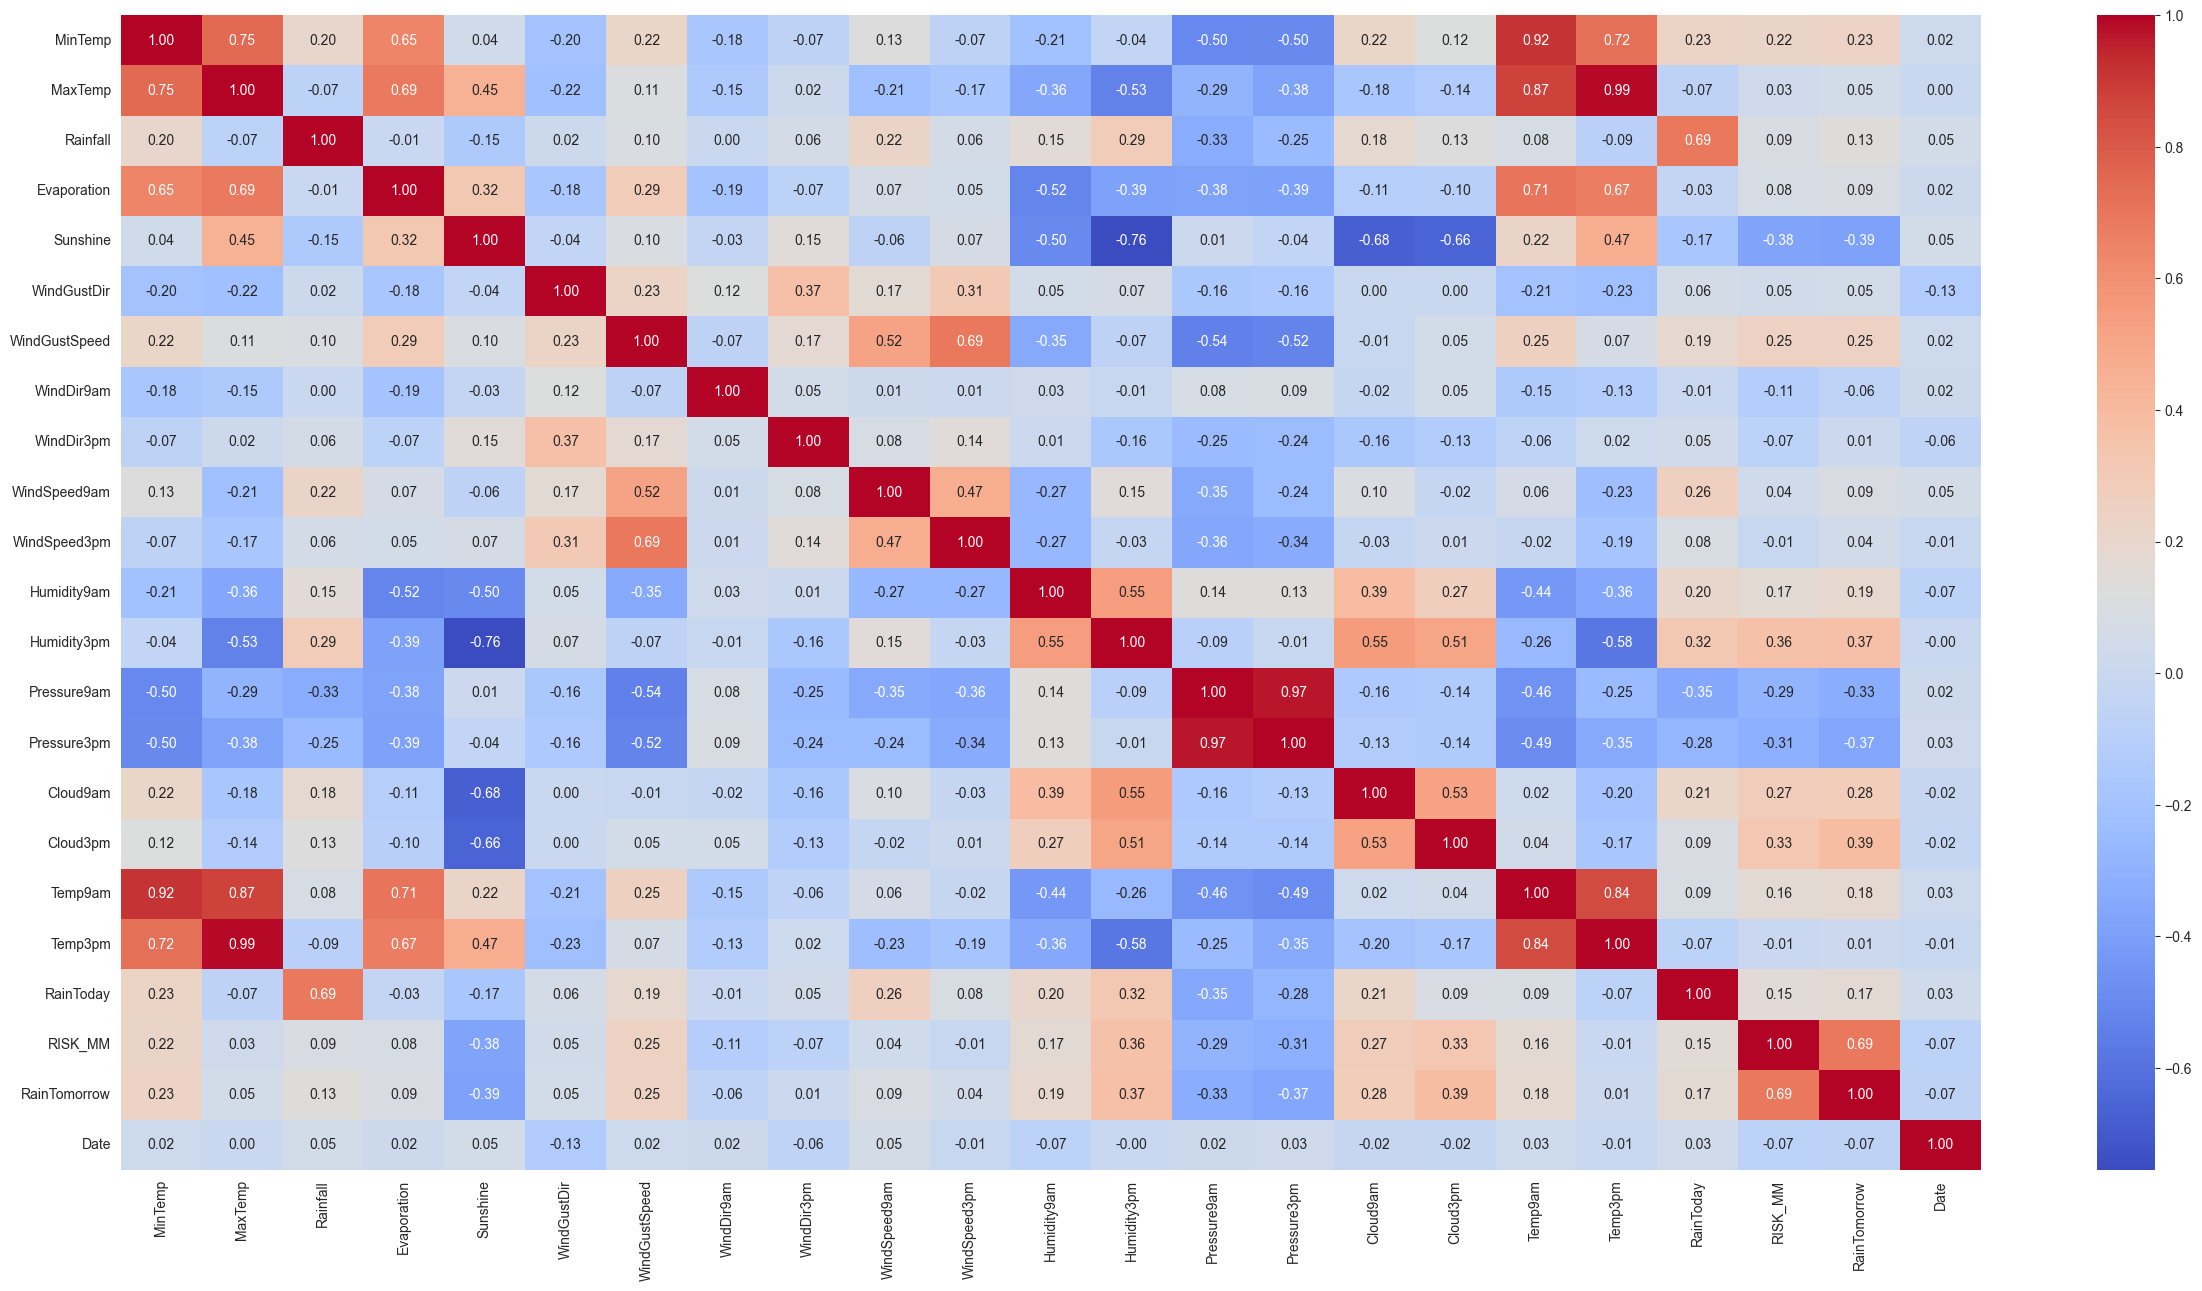

In [15]:
plt.figure(figsize=(30,15))
sns.heatmap(w.corr(), annot=True, cmap="coolwarm", fmt=".2f" ,)
plt.show()

Average Temprature by month

In [16]:
w['Date'] = pd.to_datetime(w['Date'])
w['Month'] =w['Date'].dt.month
monthly_avg_max_temp = w.groupby('Month')['MaxTemp'].mean()
monthly_avg_min_temp = w.groupby('Month')['MinTemp'].mean()

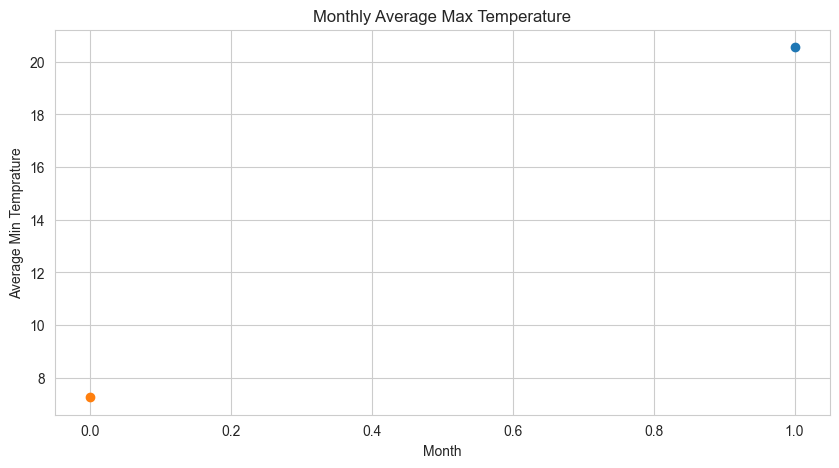

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, monthly_avg_min_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.ylabel('Average Min Temprature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

In [18]:
X = w[['MinTemp', 'MaxTemp']]
y = w['Rainfall']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
y_test

193     0.0
33      6.6
15      0.0
310     0.0
57     14.4
       ... 
82      0.0
94      0.0
192     0.0
307     0.0
211     0.0
Name: Rainfall, Length: 74, dtype: float64

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.0768456005826


In [22]:
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 1, Lowest rainfall month: 1
